# Analyzing Growth in Diversity of Actors in the Film Industry

### By: Eunice Famodimu

## Description

This project aims to explore the topic of underrepresentation of black actors in the film industry, and in particular explore the growth of the presence of lead and supporting actors of African descent over the last few decades. The data used in this project is a combination of data obtained through web scraping from various Wikipedia webpages, and data extracted from excel and csv files from the Internet. 

I will be comparing underrepresentation of black actors in Academy award nominations, and will examine whether we see a growth of black actors in successful films in general. Moreover, we will finally compare growth in the presence of black actors in high grossing films, for female versus male black actors.  

## Data Sources



* [African American Actors](https://en.wikipedia.org/w/index.php?title=Category:African-American_male_actors&pageuntil=Cox%2C+Tony%0ATony+Cox+%28actor%29#mw-pages)

* [African American Actresses](https://en.wikipedia.org/wiki/Category:African-American_actresses)

* [Imdb Data](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset)

* [Academy Awards Data Awards](https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films#cite_note-21)

# Data

## I. Web Scraping 

The data in this section was scraped from numerous Wikipedia pages that contained lists of actors from the 1800's to the current era, who have African ancestry. 


In [884]:
import sys                             # system module 
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib for graphics
import datetime as dt #Import date time for current data time information
import numpy as np # Import numpy 
import csv # Import csv
import requests as rq # Import requests
from bs4 import BeautifulSoup as bs # Import Beautiful Soup
import seaborn as sns
import scipy.stats.mstats as mstats

%matplotlib inline

In [706]:
# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)
print('Today: ', dt.date.today())

Python version: 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.19.2
Numpy version:  1.11.3
Today:  2017-05-11


### Web pages



In [241]:
# African American Males Actors

url_AA_Male1_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_male_actors'
url_AA_Male1_2 = '&pageuntil=Cox%2C+Tony%0ATony+Cox+%28actor%29#mw-pages'
url_AA_Male2_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American' 
url_AA_Male2_2 = '_male_actors&pagefrom=Cox%2C+Tony%0ATony+Cox+%28actor%29#mw-pages'
url_AA_Male3_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_male_actors'
url_AA_Male3_2 = '&pagefrom=Henry%2C+Joshua%0AJoshua+Henry#mw-pages'
url_AA_Male4_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_male_actors'
url_AA_Male4_2 = '&pagefrom=Luke%2C+Derek%0ADerek+Luke+%28actor%29#mw-pages'
url_AA_Male5_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_male_actors'
url_AA_Male5_2 = '&pagefrom=Richard%2C+Robert%0ARobert+Ri%27chard#mw-pages'
url_AA_Male6_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_male_actors'
url_AA_Male6_2 = '&pagefrom=Ward%2C+Richard%0ARichard+Ward+%28actor%29#mw-pages'

url_AA_Male1 = url_AA_Male1_1 + url_AA_Male1_2
url_AA_Male2 = url_AA_Male2_1 + url_AA_Male2_2
url_AA_Male3 = url_AA_Male3_1 + url_AA_Male3_2
url_AA_Male4 = url_AA_Male4_1 + url_AA_Male4_2
url_AA_Male5 = url_AA_Male5_1 + url_AA_Male5_2
url_AA_Male6 = url_AA_Male6_1 + url_AA_Male6_2

In [242]:
# African American Female Actors

url_AA_Female1 = 'https://en.wikipedia.org/wiki/Category:African-American_actresses'
url_AA_Female2_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_actresses' 
url_AA_Female2_2 = '&pagefrom=Fields%2C+Alexis%0AAlexis+Fields#mw-pages'
url_AA_Female3_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_actresses'
url_AA_Female3_2 = '&pagefrom=Knowles%2C+Solange%0ASolange+Knowles#mw-pages'
url_AA_Female4_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_actresses'
url_AA_Female4_2 = '&pagefrom=Ray%2C+Tanika%0ATanika+Ray#mw-pages'
url_AA_Female5_1 = 'https://en.wikipedia.org/w/index.php?title=Category:African-American_actresses'
url_AA_Female5_2 = '&pagefrom=Williamson%2C+Kenya%0AKenya+D.+Williamson#mw-pages'

url_AA_Female2 = url_AA_Female2_1 + url_AA_Female2_2
url_AA_Female3 = url_AA_Female3_1 + url_AA_Female3_2
url_AA_Female4 = url_AA_Female4_1 + url_AA_Female4_2
url_AA_Female5 = url_AA_Female5_1 + url_AA_Female5_2

##### African American Actors code

In [243]:
# Get html from browser
AA_Male1 = rq.get(url_AA_Male1)
AA_Male2 = rq.get(url_AA_Male2)
AA_Male3 = rq.get(url_AA_Male3)
AA_Male4 = rq.get(url_AA_Male4)
AA_Male5 = rq.get(url_AA_Male5)
AA_Male6 = rq.get(url_AA_Male6)

In [885]:
# Download successful? - Yes
[
(AA_Male1.status_code == 200),
(AA_Male2.status_code == 200),
(AA_Male3.status_code == 200),
(AA_Male4.status_code == 200),
(AA_Male5.status_code == 200),
(AA_Male6.status_code == 200),
]

[True, True, True, True, True, True]

In [245]:
# get data as Soup
AA_Male1_soup= bs(AA_Male1.content, 'html.parser')

# get data as Soup
AA_Male2_soup= bs(AA_Male2.content, 'html.parser')

# get data as Soup
AA_Male3_soup= bs(AA_Male3.content, 'html.parser')

# get data as Soup
AA_Male4_soup= bs(AA_Male4.content, 'html.parser')

# get data as Soup
AA_Male5_soup= bs(AA_Male5.content, 'html.parser')

# get data as Soup
AA_Male_6soup= bs(AA_Male6.content, 'html.parser')


In [886]:
# Males Group 1 

li_all_M1 = AA_Male1_soup.find_all('li')
namesM1 = []
for li in li_all_M1:
    try:
        text = li.find('a').get_text()
        namesM1.append(text)
    except AttributeError:
        pass

namesAA_male1= namesM1[2:202]
namesAA_male1

['50 Cent',
 'Quinton Aaron',
 'Barkhad Abdi',
 'Kareem Abdul-Jabbar',
 'Brandon Adams (actor)',
 'Granville Adams',
 'Tunde Adebimpe',
 'Ilunga Adell',
 'Jovan Adepo',
 'Faysal Ahmed',
 'Franklyn Ajaye',
 'Gbenga Akinnagbe',
 'Ira Aldridge',
 'Flex Alexander',
 'Terry Alexander (actor)',
 'Mahershala Ali',
 'Raymond Allen (television actor)',
 'John Amos',
 'Anthony Anderson',
 'Carl Anderson (singer)',
 'Eddie "Rochester" Anderson',
 'Haskell V. Anderson III',
 'Shedrack Anderson III',
 'André 3000',
 'Ray Aranha',
 'Louis Armstrong',
 'John A. Arneaux',
 'Jacob Artist',
 'Sharif Atkins',
 'Jensen Atwood',
 'Lloyd Avery II',
 'James Avery (actor)',
 'B.G. (rapper)',
 'Obba Babatundé',
 'Ross Bagley',
 'Philip Bailey',
 'Henry Judd Baker',
 'John Bailey (American actor)',
 'Leslie David Baker',
 'Shaun Baker (actor)',
 'Tab Baker',
 'Alimi Ballard',
 'Reginald Ballard',
 'Isaach de Bankolé',
 'Ogie Banks',
 'David Banner',
 'Tsalta Baptiste',
 'Charlie Barnett (comedian)',
 'Ty Barnet

In [887]:
# Males2

li_all_M1_2 = AA_Male2_soup.find_all('li')
namesM1_2 = []
for li in li_all_M1_2:
    try:
        text = li.find('a').get_text()
        namesM1_2.append(text)
    except AttributeError:
        pass
    
namesAA_male2= namesM1_2[2:202]
namesAA_male2

['Tony Cox (actor)',
 'Adam Jamal Craig',
 'Jermaine Crawford',
 'Lavell Crawford',
 'Terry Crews',
 'Rupert Crosse',
 'Iman Crosson',
 'Scatman Crothers',
 'Ice Cube',
 'Ji-Tu Cumbuka',
 'Rusty Cundieff',
 'Don Curry',
 'Mark Curry (actor)',
 'Vondie Curtis-Hall',
 'RJ Cyler',
 'D.C. Scorpio',
 'Percy Daggs III',
 'Draft:Dalpre Grayer',
 'Billy Daniels',
 'Dee Jay Daniels',
 'Dexter Darden',
 'Keith David',
 'Tommy Davidson',
 'Charles Michael Davis',
 'Clifton Davis',
 "D'Mitch Davis",
 'DeRay Davis',
 'Duane Davis',
 'LaVan Davis',
 'Nore Davis',
 'Ossie Davis',
 'Sammy Davis Jr.',
 'Sammy Davis Sr.',
 'EJay Day',
 'Deezer D',
 'Oscar DeGruy',
 'Bob Delegall',
 'Erik Dellums',
 'Clinton Derricks-Carroll',
 'Cleavant Derricks (actor)',
 'Brandon DeShazer',
 'Hal DeWindt',
 'Keith Diamond (actor)',
 'Dudley Dickerson',
 'Daveed Diggs',
 'Taye Diggs',
 'Thomas Dilward',
 'Brandon J. Dirden',
 'Ivan Dixon',
 'Badja Djola',
 'DMX (rapper)',
 'Colman Domingo',
 'Robert DoQui',
 'Michael D

In [888]:
# Males3

li_all_M1_3 = AA_Male3_soup.find_all('li')
namesM1_3 = []
for li in li_all_M1_3:
    try:
        text = li.find('a').get_text()
        namesM1_3.append(text)
    except AttributeError:
        pass
    
namesAA_male3= namesM1_3[2:202]
namesAA_male3

['Joshua Henry',
 'Darrin Henson',
 'Hilly Hicks',
 'Rodney Hicks',
 'Dulé Hill',
 'Gil Hill',
 'Jon Michael Hill',
 'Roger Hill (actor)',
 'Lawrence Hilton-Jacobs',
 'Gregory Hines',
 'Maurice Hines',
 'Aldis Hodge',
 'Edwin Hodge',
 'Ty Hodges',
 'Dominic Hoffman',
 'Gus Hoffman',
 'Corey Holcomb',
 'André Holland',
 'Christopher Michael Holley',
 'Kene Holliday',
 'Greg Hollimon',
 'Tommy Hollis',
 'Brian Hooks',
 'Kevin Hooks',
 'Robert Hooks',
 'Jermaine Hopkins',
 'Bobby Hosea',
 'Allen Hoskins',
 'Gavin Houston',
 'Sterling Houston',
 'Terrence Howard',
 'Ernie Hudson',
 'Ernie Hudson Jr.',
 'D. L. Hughley',
 'Harold Hunter',
 'Reginald D. Hunter',
 'Philip Hurlic',
 'Rif Hutton',
 'Earle Hyman',
 'Ice-T',
 'James Monroe Iglehart',
 'Eme Ikwuakor',
 'Rex Ingram (actor)',
 'Michael Irvin',
 'Ja Rule',
 'Michael Jace',
 "Alphonso A'Qen-Aten Jackson",
 'Brandon T. Jackson',
 'Leonard Jackson (actor)',
 'Mel Jackson',
 'Merrell Jackson',
 "O'Shea Jackson Jr.",
 'Samuel L. Jackson',


In [889]:
# Males4

li_all_M1_4 = AA_Male4_soup.find_all('li')
namesM1_4 = []
for li in li_all_M1_4:
    try:
        text = li.find('a').get_text()
        namesM1_4.append(text)
    except AttributeError:
        pass
    
namesAA_male4= namesM1_4[2:202]
namesAA_male4

['Derek Luke (actor)',
 'Bernie Mac',
 'CJ Mac',
 'Mack 10',
 'Anthony Mackie',
 'Noel MacNeal',
 'Peter Macon',
 'Blu Mankuma',
 'Mario (American singer)',
 'Pigmeat Markham',
 'Jaron Marquis',
 'John Marriott (actor)',
 'Don Marshall (actor)',
 'Larry Marshall (actor)',
 'Tim Marshall (radio host)',
 'William Marshall (actor)',
 'Christopher Martin (entertainer)',
 'Dan Martin (actor)',
 'Duane Martin',
 "D'Urville Martin",
 'Jesse L. Martin',
 'Mase',
 'Christopher Massey',
 'Kyle Massey',
 'Master Juba',
 'Master P',
 'James C. Mathis III',
 'Al Matthews',
 'Onzy Matthews',
 'Whitman Mayo',
 'MC Ren',
 'Chi McBride',
 'Billy McClain',
 'Darius McCrary',
 'Suli McCullough',
 'James McDaniel',
 'Jonathan McDaniel',
 'Sam McDaniel',
 'James McEachin',
 'Andrew McFarlane (American actor)',
 'William McGhee',
 'Charles McGregor',
 'Caleb McLaughlin',
 'Frank McRae',
 'Mo McRae',
 'Tim Meadows',
 'Aaron Meeks',
 "E'Shun Melvin",
 'Method Man',
 'Windell Middlebrooks',
 'Qaasim Middleton'

In [890]:
# Males5

li_all_M1_5 = AA_Male5_soup.find_all('li')
namesM1_5 = []
for li in li_all_M1_5:
    try:
        text = li.find('a').get_text()
        namesM1_5.append(text)
    except AttributeError:
        pass
    
namesAA_male5= namesM1_5[2:202]
namesAA_male5

["Robert Ri'chard",
 'J. August Richards',
 'Kevin Michael Richardson',
 'Marque Richardson',
 'Ron Richardson',
 'Sam Richardson (actor)',
 'Sy Richardson',
 'Deon Richmond',
 'Tequan Richmond',
 'Stephen Rider',
 'Larry Riley (actor)',
 'Robert Christopher Riley',
 'Sean Ringgold',
 'Rodney Allen Rippy',
 'Robert Christian',
 'Davis Roberts',
 'Leonard Roberts',
 'Michael D. Roberts',
 'Tony T. Roberts',
 'Lance Robertson',
 'Paul Robeson',
 'Bill Robinson',
 'Bumper Robinson',
 'Charlie Robinson (actor)',
 'Craig Robinson (actor)',
 'Jimmy Robinson (actor)',
 'Keith Robinson (actor)',
 'Leon Robinson',
 'Matt Robinson (actor)',
 'Roger Robinson (actor)',
 'Jeff Roches',
 'Chris Rock',
 'Tony Rock',
 'Rocko (rapper)',
 'Delvon Roe',
 'Ivan Rogers (actor)',
 'Timmie Rogers',
 'Al Roker',
 'Howard Rollins',
 'Clinton Rosemond',
 'Evan Ross',
 'Ricco Ross',
 'Shavar Ross',
 'Ted Ross',
 'Rotimi (actor)',
 'Richard Roundtree',
 'Andre Royo',
 'Lamman Rucker',
 'RuPaul',
 'Tim Russ',
 'Mo

In [891]:
# Males6

li_all_M1_6 = AA_Male_6soup.find_all('li')
namesM1_6 = []
for li in li_all_M1_6:
    try:
        text = li.find('a').get_text()
        namesM1_6.append(text)
    except AttributeError:
        pass
    
namesAA_male6= namesM1_6[2:122]
namesAA_male6

['Richard Ward (actor)',
 'Vincent M. Ward',
 'Malcolm-Jamal Warner',
 'Michael Warren (actor)',
 'Blue Washington',
 'Denzel Washington',
 'Isaiah Washington',
 'Jascha Washington',
 'Kenneth Washington',
 'Vernon Washington',
 'Damien Dante Wayans',
 'Damon Wayans',
 'Damon Wayans Jr.',
 'Dwayne Wayans',
 'Keenen Ivory Wayans',
 'Marlon Wayans',
 'Shawn Wayans',
 'WC (rapper)',
 'Carl Weathers',
 'Sean Weathers',
 'Jason Weaver',
 'Lee Weaver',
 'Derek Webster (actor)',
 'John Wesley (actor)',
 'Ernie Wheelwright (running back)',
 'Leigh Whipper',
 'Denzel Whitaker',
 'Forest Whitaker',
 'Kenn Whitaker',
 'Al White',
 'Brian J. White',
 "De'voreaux White",
 'Jaleel White',
 'Michael Jai White',
 'Slappy White',
 'Steve White (actor)',
 'Tye White',
 'Charles Malik Whitfield',
 'Dondre Whitfield',
 'Vantile Whitfield',
 'Napoleon Whiting',
 'Isiah Whitlock Jr.',
 'Ernest Whitman',
 'Jack Wiggins',
 'Ralph Wilcox (actor)',
 'Wayne Wilderson',
 'Tristan Wilds',
 'Billy Dee Williams',
 "

In [892]:
# Noteable male actors of African descent, not included in Wikipedia page

notable1 = [
'Djimon Hounsou', 'Chiwetel Ejiofor', 'David Oyelowo', 'Adewale Akinnuoye-Agbaje', 'Idris Elba', 'Omar Sy, John Boyega', 'Nonso Anozie', 'Isaach De Bankole', 'Gbenga Akinnagbe', 
'Peter Mensah', 'Richard Ayoade', 'Tongayi Chirisa', 'Dayo Okeniyi', 'Yaphet Kotto', 'Hugh Quarshie', 'Ntare Guma Mbaho Mwine', 'John Kani', 'Edi Gathegi', 'Sahr Ngaujah', 'Presley Chweneyagae', 
'Eriq Ebouaney', 'Aml Ameen', 'N!xau, Hakeem Kae-Kazim', 'Ato Essandoh', 'Fana Mokoena', 'Daniel Kaluuya']

In [893]:
# Add List
namesAA_male= namesAA_male1 + namesAA_male2 + namesAA_male3 + namesAA_male4 + namesAA_male5 + namesAA_male6 + notable1
namesAA_male

['50 Cent',
 'Quinton Aaron',
 'Barkhad Abdi',
 'Kareem Abdul-Jabbar',
 'Brandon Adams (actor)',
 'Granville Adams',
 'Tunde Adebimpe',
 'Ilunga Adell',
 'Jovan Adepo',
 'Faysal Ahmed',
 'Franklyn Ajaye',
 'Gbenga Akinnagbe',
 'Ira Aldridge',
 'Flex Alexander',
 'Terry Alexander (actor)',
 'Mahershala Ali',
 'Raymond Allen (television actor)',
 'John Amos',
 'Anthony Anderson',
 'Carl Anderson (singer)',
 'Eddie "Rochester" Anderson',
 'Haskell V. Anderson III',
 'Shedrack Anderson III',
 'André 3000',
 'Ray Aranha',
 'Louis Armstrong',
 'John A. Arneaux',
 'Jacob Artist',
 'Sharif Atkins',
 'Jensen Atwood',
 'Lloyd Avery II',
 'James Avery (actor)',
 'B.G. (rapper)',
 'Obba Babatundé',
 'Ross Bagley',
 'Philip Bailey',
 'Henry Judd Baker',
 'John Bailey (American actor)',
 'Leslie David Baker',
 'Shaun Baker (actor)',
 'Tab Baker',
 'Alimi Ballard',
 'Reginald Ballard',
 'Isaach de Bankolé',
 'Ogie Banks',
 'David Banner',
 'Tsalta Baptiste',
 'Charlie Barnett (comedian)',
 'Ty Barnet

In [254]:
# Final Data Set
d= "Male"
M_AA= [d for i in namesAA_male]

# Race
e= "African Descent"
r_AA= [e for i in namesAA_male]

# Combine
AA_males = pd.DataFrame({'names':namesAA_male, 'sex':M_AA, 'race': r_AA })
AA_males

,names,race,sex
0,50 Cent,African Descent,Male
1,Quinton Aaron,African Descent,Male
2,Barkhad Abdi,African Descent,Male
3,Kareem Abdul-Jabbar,African Descent,Male
4,Brandon Adams (actor),African Descent,Male
5,Granville Adams,African Descent,Male
6,Tunde Adebimpe,African Descent,Male
7,Ilunga Adell,African Descent,Male
8,Jovan Adepo,African Descent,Male
9,Faysal Ahmed,African Descent,Male


#### African American Actresses

In [894]:
# Get html from browser

AA_Female1 = rq.get(url_AA_Female1)
AA_Female2 = rq.get(url_AA_Female2)
AA_Female3 = rq.get(url_AA_Female3)
AA_Female4 = rq.get(url_AA_Female4)
AA_Female5 = rq.get(url_AA_Female5)

In [895]:
# Download successful? - Yes

[AA_Female1.status_code,
 AA_Female2.status_code,
 AA_Female3.status_code,
 AA_Female4.status_code,
 AA_Female5.status_code
]

[200, 200, 200, 200, 200]

In [257]:
# get data as Soup
AA_Female1_soup= bs(AA_Female1.content, 'html.parser')

# get data as Soup
AA_Female2_soup= bs(AA_Female2.content, 'html.parser')

# get data as Soup
AA_Female3_soup= bs(AA_Female3.content, 'html.parser')

# get data as Soup
AA_Female4_soup= bs(AA_Female4.content, 'html.parser')

# get data as Soup
AA_Female5_soup= bs(AA_Female5.content, 'html.parser')


In [896]:
# Females Group 1

li_all_F1 = AA_Female1_soup.find_all('li')
namesF1 = []
for li in li_all_F1:
    try:
        text = li.find('a').get_text()
        namesF1.append(text)
    except AttributeError:
        pass
    
namesAA_Female1= namesF1[1:201]
namesAA_Female1

['Mariann Aalda',
 'Aaliyah',
 'Diahnne Abbott',
 'Loretta Abbott',
 'Donzaleigh Abernathy',
 'Abiola Abrams',
 'Acquanetta',
 'Osceola Macarthy Adams',
 'Yolanda Adams',
 'Uzo Aduba',
 'Erika Alexander',
 'Tatyana Ali',
 'Mary Alice',
 'Lexi Allen',
 'Billie Allen',
 'Debbie Allen',
 'Jonelle Allen',
 'Sasha Allen',
 'Amerie',
 'Maya Angelou',
 'Tichina Arnold',
 'Ashanti (singer)',
 'Karan Ashley',
 'Essence Atkins',
 'Beverly Hope Atkinson',
 'Ruth Attaway',
 'K. D. Aubert',
 'Ashley August',
 'Margaret Avery',
 'Shondrella Avery',
 'Ethel Ayler',
 'Rochelle Aytes',
 "De'Adre Aziza",
 'Vanessa Baden',
 'Cynthia Bailey',
 'Pearl Bailey',
 'Tyra Banks',
 'Tanya Barfield',
 'Etta Moten Barnett',
 'Fantasia Barrino',
 'Angela Bassett',
 'Ryan Michelle Bathe',
 'Simone Battle',
 'Ruth Virginia Bayton',
 'Jennifer Beals',
 'Carlena Beard',
 'Louise Beavers',
 'Zazie Beetz',
 'Nicole Beharie',
 'Patricia Belcher',
 'Felecia M. Bell',
 'Jean Bell',
 'Troian Bellisario',
 'Fran Bennett',
 'R

In [901]:
# Females Group 2

li_all_F2 = AA_Female2_soup.find_all('li')
namesF2 = []
for li in li_all_F2:
    try:
        text = li.find('a').get_text()
        namesF2.append(text)
    except AttributeError:
        pass
    
namesAA_Female2= namesF2[1:201]
namesAA_Female2

['Alexis Fields',
 'Chip Fields',
 'Kim Fields',
 'Edwina Findley',
 'Gail Fisher',
 'Patrice Fisher',
 'Gloria Foster',
 'Crystal R. Fox',
 'Vivica A. Fox',
 'Jaimee Foxworth',
 'Minnie Foxx',
 'Karen Fraction',
 'Stacy Francis',
 'Farrah Franklin',
 'Marina Franklin',
 'Tomiko Fraser',
 'Sheila Frazier',
 'Jennia Fredrique',
 'Carlotta Freeman',
 'Jennifer Freeman',
 'Yvette Freeman',
 'Daniele Gaither',
 'Lita Gaithers',
 'Maura Gale',
 'Susie Garrett',
 'Nona Gaye',
 'Gloria Gaynor',
 'Minnie Gentry',
 'Geretta Geretta',
 'Marla Gibbs',
 'Mercedes Gilbert',
 'Nancy Giles',
 'Erica Gimpel',
 'Adele Givens',
 'Robin Givens',
 'Candice Glover',
 'Cat Glover',
 'Montego Glover',
 'Whoopi Goldberg',
 'Renée Elise Goldsberry',
 'Reagan Gomez-Preston',
 "La'Myia Good",
 'Meagan Good',
 'Elena Goode',
 'Deidre Goodwin',
 'Kia Goodwin',
 'Raven Goodwin',
 'Denise Gordy',
 'Galyn Görg',
 'Deneen Graham',
 'Kat Graham',
 'Crystal Celeste Grant',
 'Teresa Graves',
 'Macy Gray',
 'Alexandra Gre

In [902]:
# Females Group 3

li_all_F3 = AA_Female3_soup.find_all('li')
namesF3 = []
for li in li_all_F3:
    try:
        text = li.find('a').get_text()
        namesF3.append(text)
    except AttributeError:
        pass
    
namesAA_Female3= namesF3[1:201]
namesAA_Female3

['Solange Knowles',
 'Zoë Kravitz',
 'Patti LaBelle',
 'Deborah Lacey',
 'LaChanze',
 'Lady Cam',
 'The Lady of Rage',
 'Sasha Lane',
 'Sanaa Lathan',
 'Syr Law',
 'Bianca Lawson',
 'Chene Lawson',
 'Denyce Lawton',
 'NeNe Leakes',
 'Sharon Leal',
 'Sabrina Le Beauf',
 'Ledisi',
 'Charmin Lee',
 'Joie Lee',
 'Raquel Lee',
 'Jeni Le Gon',
 'Lillian Lehman',
 'Kasi Lemmons',
 'Rosetta LeNoire',
 'Adriane Lenox',
 'Urylee Leonardos',
 'Ketty Lester',
 'Dawnn Lewis',
 'Jazsmin Lewis',
 'Jenifer Lewis',
 'Toni Lewis',
 'Tina Lifford',
 'Destiny Lightsy',
 'AzMarie Livingston',
 'Tembi Locke',
 'Bellina Logan',
 'LaToya London',
 'Lauren London',
 'Loretta Long',
 'Nia Long',
 'Mammy Lou',
 'Loni Love',
 'Mother Love',
 'Marcella Lowery',
 'Shanti Lowry',
 'LeToya Luckett',
 'Luenell',
 'Donyale Luna',
 'Tanisha Lynn',
 'Moms Mabley',
 'Janet MacLachlan',
 'Tamela Mann',
 'Teal Marchande',
 'Eva Marcille',
 'Meghan Markle',
 'Sonequa Martin-Green',
 'Alex Martin',
 'Helen Martin',
 'Tanjaree

In [903]:
# Females Group 4

li_all_F4 = AA_Female4_soup.find_all('li')
namesF4 = []
for li in li_all_F4:
    try:
        text = li.find('a').get_text()
        namesF4.append(text)
    except AttributeError:
        pass
    
namesAA_Female4= namesF4[1:201]
namesAA_Female4

['Tanika Ray',
 'Jazz Raycole',
 'Rebecca Rice (actress)',
 'Veronica Redd',
 'Tracy Reed (American actress)',
 'Vivian Reed (musical theatre actress)',
 'Della Reese',
 'Daphne Maxwell Reid',
 'Retta',
 'Anita Thompson Dickinson Reynolds',
 'Vickilyn Reynolds',
 'Beah Richards',
 'LaTanya Richardson',
 'Salli Richardson',
 'Tijuana Ricks',
 'Amber Riley',
 'Naya Rivera',
 'Eslanda Goode Robeson',
 'Angela Robinson (actress)',
 'Shaun Robinson',
 'Wendy Raquel Robinson',
 'Kitana Kiki Rodriguez',
 'Roxie Roker',
 'Esther Rolle',
 'Rose Rollins',
 'Xosha Roquemore',
 'Anika Noni Rose',
 'Rhonda Ross Kendrick',
 'Angelica Ross',
 'Diana Ross',
 'Tracee Ellis Ross',
 'Tracey Ross',
 'Victoria Rowell',
 'Kelly Rowland',
 'Alice B. Russell',
 'Kimberly Russell',
 'Roz Ryan',
 'Rye Rye',
 'Zoe Saldana',
 'Giovonnie Samuels',
 'Ajai Sanders',
 'Diana Sands',
 'Isabel Sanford',
 'Saniyya Sidney',
 'India Scandrick',
 'Mercedes Scelba-Shorte',
 'Esther Scott',
 'Jill Scott',
 'Judith Scott (Ame

In [904]:
# Females Group 5

li_all_F5 = AA_Female5_soup.find_all('li')
namesF5 = []
for li in li_all_F5:
    try:
        text = li.find('a').get_text()
        namesF5.append(text)
    except AttributeError:
        pass
    
namesAA_Female5= namesF5[1:29]
namesAA_Female5

['Kenya D. Williamson',
 'Sheila Wills',
 'Ajita Wilson',
 'Chandra Wilson',
 'Debra Wilson',
 'Nancy Wilson (jazz singer)',
 'Yvette Wilson',
 'Deborah Joy Winans',
 'Camille Winbush',
 'Saaphyri Windsor',
 'Oprah Winfrey',
 'Hattie Winston',
 'Alfre Woodard',
 'Charlayne Woodard',
 'Anita Woodley',
 'Carol Woods',
 'Renn Woods',
 'Nicole Wray',
 'Aloma Wright',
 'C. Kelly Wright',
 "N'Bushe Wright",
 'Tanya Wright',
 'Lisa Wu',
 'Mia X',
 'Camille Yarbrough',
 'Yo-Yo (rapper)',
 'Sasheer Zamata',
 'Zendaya']

In [905]:
# Noteworthy female actors of African descent, not included in Wikipedia data

noteable2= ['Thandie Newton', 'Sophie Okonedo', 'Liya Kebede', 'Danai Gurira', 'Rachel Mwanza', 'Enuka Okuma', 
            'Yaya DaCosta', 'Saycon Sengbloh', 'Gugu Mbatha-Raw', 'Adina Porter', 'Ashley Madekwe', 'Annie Ilonzeh',
            "Lupita Nyong'o", 'Akosua Busia', 'Genevieve Nnaji', 'Adepero Oduye']

In [906]:
# Add List

namesAA_female = namesAA_Female1 + namesAA_Female2 + namesAA_Female3 + namesAA_Female4 + namesAA_Female5 + noteable2

In [907]:
# Final List of Black Actresses

f= "Female"
F_AA= [f for i in namesAA_female]

# Race
g= "African Descent"
r_fAA= [g for i in namesAA_female]

# Combine
AA_females = pd.DataFrame({'names':namesAA_female, 'sex':F_AA, 'race': r_fAA })
AA_females

,names,race,sex
0,Mariann Aalda,African Descent,Female
1,Aaliyah,African Descent,Female
2,Diahnne Abbott,African Descent,Female
3,Loretta Abbott,African Descent,Female
4,Donzaleigh Abernathy,African Descent,Female
5,Abiola Abrams,African Descent,Female
6,Acquanetta,African Descent,Female
7,Osceola Macarthy Adams,African Descent,Female
8,Yolanda Adams,African Descent,Female
9,Uzo Aduba,African Descent,Female


#### Combine All

In [913]:
# Complete List of Actors (Male & Female) of African Descent

df_rG = AA_males.append(AA_females)
df_rG

,names,race,sex
0,50 Cent,African Descent,Male
1,Quinton Aaron,African Descent,Male
2,Barkhad Abdi,African Descent,Male
3,Kareem Abdul-Jabbar,African Descent,Male
4,Brandon Adams (actor),African Descent,Male
5,Granville Adams,African Descent,Male
6,Tunde Adebimpe,African Descent,Male
7,Ilunga Adell,African Descent,Male
8,Jovan Adepo,African Descent,Male
9,Faysal Ahmed,African Descent,Male


In [914]:
# Formatting - remove all () and everything within
df_rG['names']= df_rG['names'].str.replace(r"\(.*\)","")
# Rename column
df_rG= df_rG.rename(columns={'names': 'actor_name'})

df_rG

,actor_name,race,sex
0,50 Cent,African Descent,Male
1,Quinton Aaron,African Descent,Male
2,Barkhad Abdi,African Descent,Male
3,Kareem Abdul-Jabbar,African Descent,Male
4,Brandon Adams,African Descent,Male
5,Granville Adams,African Descent,Male
6,Tunde Adebimpe,African Descent,Male
7,Ilunga Adell,African Descent,Male
8,Jovan Adepo,African Descent,Male
9,Faysal Ahmed,African Descent,Male


In [915]:
# Remove Duplicates
df_rG= df_rG.drop_duplicates()

# II. Imdb Data
Imdb Data from excel spreadsheet

In [943]:
# Read excel sheet
df= pd.read_excel("movie_metadata.xlsx")
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,Unnamed: 29,Unnamed: 30,28
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,NaN,NaN,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,NaN,NaN,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,NaN,NaN,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,NaN,NaN,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN,NaN,NaN
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,NaN,NaN,NaN,NaN
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,258000000.0,2007.0,11000.0,6.2,2.35,0,NaN,NaN,NaN,NaN
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,260000000.0,2010.0,553.0,7.8,1.85,29000,NaN,NaN,NaN,NaN
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,250000000.0,2015.0,21000.0,7.5,2.35,118000,NaN,NaN,NaN,NaN
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,250000000.0,2009.0,11000.0,7.5,2.35,10000,NaN,NaN,NaN,NaN


### Explore Data

In [944]:
# Data Type per field
print('Variable dtypes:\n', df.dtypes, sep='')

# Dimensions
print('Dimensions:', df.shape)

# First few rows
df.head()

Variable dtypes:
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio         

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,Unnamed: 29,Unnamed: 30,28
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,NaN,NaN,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,NaN,NaN,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,NaN,NaN,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,NaN,NaN,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN,NaN,NaN


### Clean Data

In [945]:
# Marking missing values

df= df.replace(to_replace=[' '], value=[None])

In [946]:
# Remove all movies that do not have release date years
df1= df[df['title_year'].notnull()]

In [947]:
df1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,Unnamed: 29,Unnamed: 30,28
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,NaN,NaN,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,NaN,NaN,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,NaN,NaN,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,NaN,NaN,NaN
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,NaN,NaN,NaN,NaN
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,258000000.0,2007.0,11000.0,6.2,2.35,0,NaN,NaN,NaN,NaN
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,260000000.0,2010.0,553.0,7.8,1.85,29000,NaN,NaN,NaN,NaN
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,250000000.0,2015.0,21000.0,7.5,2.35,118000,NaN,NaN,NaN,NaN
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,250000000.0,2009.0,11000.0,7.5,2.35,10000,NaN,NaN,NaN,NaN
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,250000000.0,2016.0,4000.0,6.9,2.35,197000,NaN,NaN,NaN,NaN


In [948]:
## Change year to integer

df1['title_year']= df1['title_year'].astype(int)

# Sort by Title Year

df1= df1.sort_values('title_year')

/Users/eunicefamodimu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [949]:
# Extract Variables of Interest

df1= df1[['movie_title', 'title_year', 'country' ,'genres', 'actor_1_name', 'actor_2_name', 'actor_3_name','gross', 'budget', 'imdb_score' , 'num_user_for_reviews', 'language', 'content_rating']]
df1.shape

(4935, 13)

In [950]:
# Break Up Into 3 Data Frames

df_m1 = df1[['movie_title', 'title_year', 'country', 'genres', 'actor_1_name','gross', 'budget', 'imdb_score' , 'num_user_for_reviews', 'language', 'content_rating']]
df_m2 = df1[['movie_title', 'title_year', 'country', 'genres', 'actor_2_name','gross', 'budget', 'imdb_score' , 'num_user_for_reviews', 'language', 'content_rating']]
df_m3 = df1[['movie_title', 'title_year', 'country', 'genres', 'actor_3_name','gross', 'budget', 'imdb_score' , 'num_user_for_reviews', 'language', 'content_rating']]

In [951]:
# Rename actor columns column
df_m1= df_m1.rename(columns={'actor_1_name': 'actor_name', 'movie_title': 'Film', 'title_year': 'Year'})
df_m2= df_m2.rename(columns={'actor_2_name': 'actor_name', 'movie_title': 'Film', 'title_year': 'Year'})
df_m3= df_m3.rename(columns={'actor_3_name': 'actor_name', 'movie_title': 'Film', 'title_year': 'Year'})

# Academy Awards Data
Academy Awards data from excel spreadsheet

In [929]:
award_dat= pd.read_excel("awards.xlsx")

In [930]:
award_dat

,Film,Year,Awards,Nominations
0,Moonlight,2016,3,8
1,La La Land,2016,6,14
2,Hacksaw Ridge,2016,2,6
3,Manchester by the Sea,2016,2,6
4,Arrival,2016,1,8
5,Fences,2016,1,4
6,Fantastic Beasts and Where to Find Them,2016,1,2
7,The Jungle Book,2016,1,1
8,O.J.: Made in America,2016,1,1
9,Piper,2016,1,1


In [952]:
award_dat.dtypes

Film           object
Year            int64
Awards          int64
Nominations     int64
dtype: object

## Combine Data
Combine Race data, IMDB data, and Academy Awards data

### Group 1 - Lead Actors

* Add race and gender of main actors to movie data

In [932]:
# Group 1
combo1 = pd.merge(df_m1, df_rG,   # left and right df's
                 how='left',        # add to left 
                 on='actor_name'       # link with this variable/column 
                ) 

combo1

,Film,Year,country,genres,actor_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race,sex
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,Drama|History|War,Lillian Gish,NaN,385907.0,8.0,88.0,NaN,Not Rated,NaN,NaN
1,Over the Hill to the Poorhouse,1920,USA,Crime|Drama,Stephen Carr,3000000.0,100000.0,4.8,1.0,NaN,NaN,NaN,NaN
2,The Big Parade,1925,USA,Drama|Romance|War,John Gilbert,NaN,245000.0,8.3,45.0,NaN,Not Rated,NaN,NaN
3,Metropolis,1927,Germany,Drama|Sci-Fi,Brigitte Helm,26435.0,6000000.0,8.3,413.0,German,Not Rated,NaN,NaN
4,The Broadway Melody,1929,USA,Musical|Romance,Anita Page,2808000.0,379000.0,6.3,71.0,English,Passed,NaN,NaN
5,Pandora's Box,1929,Germany,Crime|Drama|Romance,Louise Brooks,9950.0,NaN,8.0,84.0,German,Not Rated,NaN,NaN
6,Hell's Angels,1930,USA,Drama|War,Jean Harlow,NaN,3950000.0,7.8,53.0,English,Passed,NaN,NaN
7,A Farewell to Arms,1932,USA,Drama|Romance|War,Gary Cooper,NaN,800000.0,6.6,46.0,English,Unrated,NaN,NaN
8,42nd Street,1933,USA,Comedy|Musical|Romance,Ginger Rogers,2300000.0,439000.0,7.7,97.0,English,Unrated,NaN,NaN
9,She Done Him Wrong,1933,USA,Comedy|Drama|History|Musical|Romance,Mae West,NaN,200000.0,6.5,59.0,English,Approved,NaN,NaN


In [953]:
# Dimensions
combo1.shape

(4935, 13)

* Add number of awards per movie to combo data

In [954]:
# Group 1
combo1_1 = pd.merge(combo1, award_dat,   # left and right df's
                 how='left',        # add to left 
                 on=['Film','Year']      # link with this variable/column 
                ) 

combo1_1

,Film,Year,country,genres,actor_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race,sex,Awards,Nominations
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,Drama|History|War,Lillian Gish,NaN,385907.0,8.0,88.0,NaN,Not Rated,NaN,NaN,NaN,NaN
1,Over the Hill to the Poorhouse,1920,USA,Crime|Drama,Stephen Carr,3000000.0,100000.0,4.8,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,The Big Parade,1925,USA,Drama|Romance|War,John Gilbert,NaN,245000.0,8.3,45.0,NaN,Not Rated,NaN,NaN,NaN,NaN
3,Metropolis,1927,Germany,Drama|Sci-Fi,Brigitte Helm,26435.0,6000000.0,8.3,413.0,German,Not Rated,NaN,NaN,NaN,NaN
4,The Broadway Melody,1929,USA,Musical|Romance,Anita Page,2808000.0,379000.0,6.3,71.0,English,Passed,NaN,NaN,1.0,3.0
5,Pandora's Box,1929,Germany,Crime|Drama|Romance,Louise Brooks,9950.0,NaN,8.0,84.0,German,Not Rated,NaN,NaN,NaN,NaN
6,Hell's Angels,1930,USA,Drama|War,Jean Harlow,NaN,3950000.0,7.8,53.0,English,Passed,NaN,NaN,NaN,NaN
7,A Farewell to Arms,1932,USA,Drama|Romance|War,Gary Cooper,NaN,800000.0,6.6,46.0,English,Unrated,NaN,NaN,2.0,4.0
8,42nd Street,1933,USA,Comedy|Musical|Romance,Ginger Rogers,2300000.0,439000.0,7.7,97.0,English,Unrated,NaN,NaN,NaN,NaN
9,She Done Him Wrong,1933,USA,Comedy|Drama|History|Musical|Romance,Mae West,NaN,200000.0,6.5,59.0,English,Approved,NaN,NaN,NaN,NaN


In [955]:
# Dimensions
combo1_1.shape

(4935, 15)

In [956]:
# Rename Actor Name to Actor_1
combo1_1= combo1_1.rename(columns={'race': 'race_1', 'actor_name': 'actor_1_name', 'sex': 'sex_1'})
# Set Index
combo1_1= combo1_1.set_index("Year", "Film")

In [957]:
# Replace missing
combo1_1['Awards']= (combo1_1['Awards'].replace(to_replace=[None], value=0))
combo1_1['race_1']= (combo1_1['race_1'].replace(to_replace=[None], value="Other"))
combo1_1['sex_1']= (combo1_1['sex_1'].replace(to_replace=[None], value="Other"))

In [958]:
# See
combo1_1

,Film,country,genres,actor_1_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race_1,sex_1,Awards,Nominations
Year,,,,,,,,,,,,,,
1916,Intolerance: Love's Struggle Throughout the Ages,USA,Drama|History|War,Lillian Gish,NaN,385907.0,8.0,88.0,NaN,Not Rated,Other,Other,0.0,NaN
1920,Over the Hill to the Poorhouse,USA,Crime|Drama,Stephen Carr,3000000.0,100000.0,4.8,1.0,NaN,NaN,Other,Other,0.0,NaN
1925,The Big Parade,USA,Drama|Romance|War,John Gilbert,NaN,245000.0,8.3,45.0,NaN,Not Rated,Other,Other,0.0,NaN
1927,Metropolis,Germany,Drama|Sci-Fi,Brigitte Helm,26435.0,6000000.0,8.3,413.0,German,Not Rated,Other,Other,0.0,NaN
1929,The Broadway Melody,USA,Musical|Romance,Anita Page,2808000.0,379000.0,6.3,71.0,English,Passed,Other,Other,1.0,3.0
1929,Pandora's Box,Germany,Crime|Drama|Romance,Louise Brooks,9950.0,NaN,8.0,84.0,German,Not Rated,Other,Other,0.0,NaN
1930,Hell's Angels,USA,Drama|War,Jean Harlow,NaN,3950000.0,7.8,53.0,English,Passed,Other,Other,0.0,NaN
1932,A Farewell to Arms,USA,Drama|Romance|War,Gary Cooper,NaN,800000.0,6.6,46.0,English,Unrated,Other,Other,2.0,4.0
1933,42nd Street,USA,Comedy|Musical|Romance,Ginger Rogers,2300000.0,439000.0,7.7,97.0,English,Unrated,Other,Other,0.0,NaN


### Group 2 - Supporting Actors 1


* Add race and gender of main actors to movie data

In [959]:
# Group 2
combo2 = pd.merge(df_m2, df_rG,   # left and right df's
                 how='left',        # add to left 
                 on='actor_name'       # link with this variable/column 
                ) 

combo2

,Film,Year,country,genres,actor_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race,sex
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,Drama|History|War,Mae Marsh,NaN,385907.0,8.0,88.0,NaN,Not Rated,NaN,NaN
1,Over the Hill to the Poorhouse,1920,USA,Crime|Drama,Johnnie Walker,3000000.0,100000.0,4.8,1.0,NaN,NaN,NaN,NaN
2,The Big Parade,1925,USA,Drama|Romance|War,Ren’e Ador’e,NaN,245000.0,8.3,45.0,NaN,Not Rated,NaN,NaN
3,Metropolis,1927,Germany,Drama|Sci-Fi,Gustav Fr’_hlich,26435.0,6000000.0,8.3,413.0,German,Not Rated,NaN,NaN
4,The Broadway Melody,1929,USA,Musical|Romance,Bessie Love,2808000.0,379000.0,6.3,71.0,English,Passed,NaN,NaN
5,Pandora's Box,1929,Germany,Crime|Drama|Romance,Francis Lederer,9950.0,NaN,8.0,84.0,German,Not Rated,NaN,NaN
6,Hell's Angels,1930,USA,Drama|War,Marian Marsh,NaN,3950000.0,7.8,53.0,English,Passed,NaN,NaN
7,A Farewell to Arms,1932,USA,Drama|Romance|War,Helen Hayes,NaN,800000.0,6.6,46.0,English,Unrated,NaN,NaN
8,42nd Street,1933,USA,Comedy|Musical|Romance,Dick Powell,2300000.0,439000.0,7.7,97.0,English,Unrated,NaN,NaN
9,She Done Him Wrong,1933,USA,Comedy|Drama|History|Musical|Romance,Gilbert Roland,NaN,200000.0,6.5,59.0,English,Approved,NaN,NaN


In [960]:
combo2.shape

(4935, 13)

* Add number of awards per movie to combo data

In [961]:
# Group 2
combo2_1 = pd.merge(combo2, award_dat,   # left and right df's
                 how='left',        # add to left 
                 on=['Film','Year']      # link with this variable/column 
                ) 

combo2_1

,Film,Year,country,genres,actor_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race,sex,Awards,Nominations
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,Drama|History|War,Mae Marsh,NaN,385907.0,8.0,88.0,NaN,Not Rated,NaN,NaN,NaN,NaN
1,Over the Hill to the Poorhouse,1920,USA,Crime|Drama,Johnnie Walker,3000000.0,100000.0,4.8,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,The Big Parade,1925,USA,Drama|Romance|War,Ren’e Ador’e,NaN,245000.0,8.3,45.0,NaN,Not Rated,NaN,NaN,NaN,NaN
3,Metropolis,1927,Germany,Drama|Sci-Fi,Gustav Fr’_hlich,26435.0,6000000.0,8.3,413.0,German,Not Rated,NaN,NaN,NaN,NaN
4,The Broadway Melody,1929,USA,Musical|Romance,Bessie Love,2808000.0,379000.0,6.3,71.0,English,Passed,NaN,NaN,1.0,3.0
5,Pandora's Box,1929,Germany,Crime|Drama|Romance,Francis Lederer,9950.0,NaN,8.0,84.0,German,Not Rated,NaN,NaN,NaN,NaN
6,Hell's Angels,1930,USA,Drama|War,Marian Marsh,NaN,3950000.0,7.8,53.0,English,Passed,NaN,NaN,NaN,NaN
7,A Farewell to Arms,1932,USA,Drama|Romance|War,Helen Hayes,NaN,800000.0,6.6,46.0,English,Unrated,NaN,NaN,2.0,4.0
8,42nd Street,1933,USA,Comedy|Musical|Romance,Dick Powell,2300000.0,439000.0,7.7,97.0,English,Unrated,NaN,NaN,NaN,NaN
9,She Done Him Wrong,1933,USA,Comedy|Drama|History|Musical|Romance,Gilbert Roland,NaN,200000.0,6.5,59.0,English,Approved,NaN,NaN,NaN,NaN


In [962]:
combo2_1.shape

(4935, 15)

In [963]:
# Rename Actor Name to Actor_2
combo2_1= combo2_1.rename(columns={'race': 'race_2', 'actor_name': 'actor_2_name', 'sex': 'sex_2'})
# Set Index
combo2_1= combo2_1.set_index("Year", "Film")

In [964]:
# Replace missing 
combo2_1['Awards']= (combo2_1['Awards'].replace(to_replace=[None], value=0))
combo2_1['race_2']= (combo2_1['race_2'].replace(to_replace=[None], value="Other"))
combo2_1['sex_2']= (combo2_1['sex_2'].replace(to_replace=[None], value="Other"))

In [965]:
# See
combo2_1

,Film,country,genres,actor_2_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race_2,sex_2,Awards,Nominations
Year,,,,,,,,,,,,,,
1916,Intolerance: Love's Struggle Throughout the Ages,USA,Drama|History|War,Mae Marsh,NaN,385907.0,8.0,88.0,NaN,Not Rated,Other,Other,0.0,NaN
1920,Over the Hill to the Poorhouse,USA,Crime|Drama,Johnnie Walker,3000000.0,100000.0,4.8,1.0,NaN,NaN,Other,Other,0.0,NaN
1925,The Big Parade,USA,Drama|Romance|War,Ren’e Ador’e,NaN,245000.0,8.3,45.0,NaN,Not Rated,Other,Other,0.0,NaN
1927,Metropolis,Germany,Drama|Sci-Fi,Gustav Fr’_hlich,26435.0,6000000.0,8.3,413.0,German,Not Rated,Other,Other,0.0,NaN
1929,The Broadway Melody,USA,Musical|Romance,Bessie Love,2808000.0,379000.0,6.3,71.0,English,Passed,Other,Other,1.0,3.0
1929,Pandora's Box,Germany,Crime|Drama|Romance,Francis Lederer,9950.0,NaN,8.0,84.0,German,Not Rated,Other,Other,0.0,NaN
1930,Hell's Angels,USA,Drama|War,Marian Marsh,NaN,3950000.0,7.8,53.0,English,Passed,Other,Other,0.0,NaN
1932,A Farewell to Arms,USA,Drama|Romance|War,Helen Hayes,NaN,800000.0,6.6,46.0,English,Unrated,Other,Other,2.0,4.0
1933,42nd Street,USA,Comedy|Musical|Romance,Dick Powell,2300000.0,439000.0,7.7,97.0,English,Unrated,Other,Other,0.0,NaN


### Group 3 - Supporting Actors 2

* Add race and gender of main actors to movie data

In [966]:
# Group 3
combo3 = pd.merge(df_m3, df_rG,   # left and right df's
                 how='left',        # add to left 
                 on='actor_name'       # link with this variable/column 
                ) 

combo3

,Film,Year,country,genres,actor_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race,sex
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,Drama|History|War,Walter Long,NaN,385907.0,8.0,88.0,NaN,Not Rated,NaN,NaN
1,Over the Hill to the Poorhouse,1920,USA,Crime|Drama,Mary Carr,3000000.0,100000.0,4.8,1.0,NaN,NaN,NaN,NaN
2,The Big Parade,1925,USA,Drama|Romance|War,Claire Adams,NaN,245000.0,8.3,45.0,NaN,Not Rated,NaN,NaN
3,Metropolis,1927,Germany,Drama|Sci-Fi,Rudolf Klein-Rogge,26435.0,6000000.0,8.3,413.0,German,Not Rated,NaN,NaN
4,The Broadway Melody,1929,USA,Musical|Romance,Charles King,2808000.0,379000.0,6.3,71.0,English,Passed,NaN,NaN
5,Pandora's Box,1929,Germany,Crime|Drama|Romance,Fritz Kortner,9950.0,NaN,8.0,84.0,German,Not Rated,NaN,NaN
6,Hell's Angels,1930,USA,Drama|War,James Hall,NaN,3950000.0,7.8,53.0,English,Passed,NaN,NaN
7,A Farewell to Arms,1932,USA,Drama|Romance|War,Adolphe Menjou,NaN,800000.0,6.6,46.0,English,Unrated,NaN,NaN
8,42nd Street,1933,USA,Comedy|Musical|Romance,George Brent,2300000.0,439000.0,7.7,97.0,English,Unrated,NaN,NaN
9,She Done Him Wrong,1933,USA,Comedy|Drama|History|Musical|Romance,Louise Beavers,NaN,200000.0,6.5,59.0,English,Approved,African Descent,Female


In [967]:
combo3.shape

(4935, 13)

In [968]:
# Group 2
combo3_1 = pd.merge(combo3, award_dat,   # left and right df's
                 how='left',        # add to left 
                 on=['Film','Year']      # link with this variable/column 
                ) 

combo3_1

,Film,Year,country,genres,actor_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race,sex,Awards,Nominations
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,Drama|History|War,Walter Long,NaN,385907.0,8.0,88.0,NaN,Not Rated,NaN,NaN,NaN,NaN
1,Over the Hill to the Poorhouse,1920,USA,Crime|Drama,Mary Carr,3000000.0,100000.0,4.8,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,The Big Parade,1925,USA,Drama|Romance|War,Claire Adams,NaN,245000.0,8.3,45.0,NaN,Not Rated,NaN,NaN,NaN,NaN
3,Metropolis,1927,Germany,Drama|Sci-Fi,Rudolf Klein-Rogge,26435.0,6000000.0,8.3,413.0,German,Not Rated,NaN,NaN,NaN,NaN
4,The Broadway Melody,1929,USA,Musical|Romance,Charles King,2808000.0,379000.0,6.3,71.0,English,Passed,NaN,NaN,1.0,3.0
5,Pandora's Box,1929,Germany,Crime|Drama|Romance,Fritz Kortner,9950.0,NaN,8.0,84.0,German,Not Rated,NaN,NaN,NaN,NaN
6,Hell's Angels,1930,USA,Drama|War,James Hall,NaN,3950000.0,7.8,53.0,English,Passed,NaN,NaN,NaN,NaN
7,A Farewell to Arms,1932,USA,Drama|Romance|War,Adolphe Menjou,NaN,800000.0,6.6,46.0,English,Unrated,NaN,NaN,2.0,4.0
8,42nd Street,1933,USA,Comedy|Musical|Romance,George Brent,2300000.0,439000.0,7.7,97.0,English,Unrated,NaN,NaN,NaN,NaN
9,She Done Him Wrong,1933,USA,Comedy|Drama|History|Musical|Romance,Louise Beavers,NaN,200000.0,6.5,59.0,English,Approved,African Descent,Female,NaN,NaN


In [969]:
combo3_1.shape

(4935, 15)

In [970]:
# Rename Actor Name to Actor_2
combo3_1= combo3_1.rename(columns={'race': 'race_3', 'actor_name': 'actor_3_name', 'sex': 'sex_3'})
# Set Index
combo3_1= combo3_1.set_index("Year", "Film")

In [971]:
# Replace missing
combo3_1['Awards']= (combo3_1['Awards'].replace(to_replace=[None], value=0))
combo3_1['race_3']= (combo3_1['race_3'].replace(to_replace=[None], value="Other"))
combo3_1['sex_3']= (combo3_1['sex_3'].replace(to_replace=[None], value="Other"))
# See
combo3_1

,Film,country,genres,actor_3_name,gross,budget,imdb_score,num_user_for_reviews,language,content_rating,race_3,sex_3,Awards,Nominations
Year,,,,,,,,,,,,,,
1916,Intolerance: Love's Struggle Throughout the Ages,USA,Drama|History|War,Walter Long,NaN,385907.0,8.0,88.0,NaN,Not Rated,Other,Other,0.0,NaN
1920,Over the Hill to the Poorhouse,USA,Crime|Drama,Mary Carr,3000000.0,100000.0,4.8,1.0,NaN,NaN,Other,Other,0.0,NaN
1925,The Big Parade,USA,Drama|Romance|War,Claire Adams,NaN,245000.0,8.3,45.0,NaN,Not Rated,Other,Other,0.0,NaN
1927,Metropolis,Germany,Drama|Sci-Fi,Rudolf Klein-Rogge,26435.0,6000000.0,8.3,413.0,German,Not Rated,Other,Other,0.0,NaN
1929,The Broadway Melody,USA,Musical|Romance,Charles King,2808000.0,379000.0,6.3,71.0,English,Passed,Other,Other,1.0,3.0
1929,Pandora's Box,Germany,Crime|Drama|Romance,Fritz Kortner,9950.0,NaN,8.0,84.0,German,Not Rated,Other,Other,0.0,NaN
1930,Hell's Angels,USA,Drama|War,James Hall,NaN,3950000.0,7.8,53.0,English,Passed,Other,Other,0.0,NaN
1932,A Farewell to Arms,USA,Drama|Romance|War,Adolphe Menjou,NaN,800000.0,6.6,46.0,English,Unrated,Other,Other,2.0,4.0
1933,42nd Street,USA,Comedy|Musical|Romance,George Brent,2300000.0,439000.0,7.7,97.0,English,Unrated,Other,Other,0.0,NaN


### Combine Data Frames

* Add desired columns from combo2_1 and combo3_1 to combo1_1



In [972]:
# Combo 2
dat_desire2= combo2_1.reset_index(drop=False)[['actor_2_name', 'race_2', 'sex_2']]
dat_desire2.shape

(4935, 3)

In [973]:
# Combo 3
dat_desire3= combo3_1.reset_index(drop=False)[['actor_3_name', 'race_3', 'sex_3']]
dat_desire3.shape

(4935, 3)

* Merge the data sets

In [974]:
df_all = pd.concat([combo1_1.reset_index(drop=False), dat_desire2, dat_desire3], axis=1)
# Sort by Year
df_all= df_all.sort_values("Year")
df_all.shape

(4935, 21)

In [975]:
# Add numeric sum of black actors in each film

df_all['r1total']= df_all['race_1'].replace({'Other': 0, 'African Descent': 1})
df_all['r2total']= df_all['race_2'].replace({'Other': 0, 'African Descent': 1})
df_all['r3total']= df_all['race_3'].replace({'Other': 0, 'African Descent': 1})
df_all['sum_totals']= df_all['r1total']+ df_all['r2total']+df_all['r3total']
df_all

,Year,Film,country,genres,actor_1_name,gross,budget,imdb_score,num_user_for_reviews,language,...,actor_2_name,race_2,sex_2,actor_3_name,race_3,sex_3,r1total,r2total,r3total,sum_totals
0,1916,Intolerance: Love's Struggle Throughout the Ages,USA,Drama|History|War,Lillian Gish,NaN,385907.0,8.0,88.0,NaN,...,Mae Marsh,Other,Other,Walter Long,Other,Other,0,0,0,0
1,1920,Over the Hill to the Poorhouse,USA,Crime|Drama,Stephen Carr,3000000.0,100000.0,4.8,1.0,NaN,...,Johnnie Walker,Other,Other,Mary Carr,Other,Other,0,0,0,0
2,1925,The Big Parade,USA,Drama|Romance|War,John Gilbert,NaN,245000.0,8.3,45.0,NaN,...,Ren’e Ador’e,Other,Other,Claire Adams,Other,Other,0,0,0,0
3,1927,Metropolis,Germany,Drama|Sci-Fi,Brigitte Helm,26435.0,6000000.0,8.3,413.0,German,...,Gustav Fr’_hlich,Other,Other,Rudolf Klein-Rogge,Other,Other,0,0,0,0
4,1929,The Broadway Melody,USA,Musical|Romance,Anita Page,2808000.0,379000.0,6.3,71.0,English,...,Bessie Love,Other,Other,Charles King,Other,Other,0,0,0,0
5,1929,Pandora's Box,Germany,Crime|Drama|Romance,Louise Brooks,9950.0,NaN,8.0,84.0,German,...,Francis Lederer,Other,Other,Fritz Kortner,Other,Other,0,0,0,0
6,1930,Hell's Angels,USA,Drama|War,Jean Harlow,NaN,3950000.0,7.8,53.0,English,...,Marian Marsh,Other,Other,James Hall,Other,Other,0,0,0,0
7,1932,A Farewell to Arms,USA,Drama|Romance|War,Gary Cooper,NaN,800000.0,6.6,46.0,English,...,Helen Hayes,Other,Other,Adolphe Menjou,Other,Other,0,0,0,0
8,1933,42nd Street,USA,Comedy|Musical|Romance,Ginger Rogers,2300000.0,439000.0,7.7,97.0,English,...,Dick Powell,Other,Other,George Brent,Other,Other,0,0,0,0
9,1933,She Done Him Wrong,USA,Comedy|Drama|History|Musical|Romance,Mae West,NaN,200000.0,6.5,59.0,English,...,Gilbert Roland,Other,Other,Louise Beavers,African Descent,Female,0,0,1,1


In [976]:
# Extract Hollywood

hollywood= df_all[df_all['country'] == "USA"]
hollywood

,Year,Film,country,genres,actor_1_name,gross,budget,imdb_score,num_user_for_reviews,language,...,actor_2_name,race_2,sex_2,actor_3_name,race_3,sex_3,r1total,r2total,r3total,sum_totals
0,1916,Intolerance: Love's Struggle Throughout the Ages,USA,Drama|History|War,Lillian Gish,NaN,385907.0,8.0,88.0,NaN,...,Mae Marsh,Other,Other,Walter Long,Other,Other,0,0,0,0
1,1920,Over the Hill to the Poorhouse,USA,Crime|Drama,Stephen Carr,3000000.0,100000.0,4.8,1.0,NaN,...,Johnnie Walker,Other,Other,Mary Carr,Other,Other,0,0,0,0
2,1925,The Big Parade,USA,Drama|Romance|War,John Gilbert,NaN,245000.0,8.3,45.0,NaN,...,Ren’e Ador’e,Other,Other,Claire Adams,Other,Other,0,0,0,0
4,1929,The Broadway Melody,USA,Musical|Romance,Anita Page,2808000.0,379000.0,6.3,71.0,English,...,Bessie Love,Other,Other,Charles King,Other,Other,0,0,0,0
6,1930,Hell's Angels,USA,Drama|War,Jean Harlow,NaN,3950000.0,7.8,53.0,English,...,Marian Marsh,Other,Other,James Hall,Other,Other,0,0,0,0
7,1932,A Farewell to Arms,USA,Drama|Romance|War,Gary Cooper,NaN,800000.0,6.6,46.0,English,...,Helen Hayes,Other,Other,Adolphe Menjou,Other,Other,0,0,0,0
8,1933,42nd Street,USA,Comedy|Musical|Romance,Ginger Rogers,2300000.0,439000.0,7.7,97.0,English,...,Dick Powell,Other,Other,George Brent,Other,Other,0,0,0,0
9,1933,She Done Him Wrong,USA,Comedy|Drama|History|Musical|Romance,Mae West,NaN,200000.0,6.5,59.0,English,...,Gilbert Roland,Other,Other,Louise Beavers,African Descent,Female,0,0,1,1
10,1934,It Happened One Night,USA,Comedy|Romance,Claudette Colbert,NaN,325000.0,8.2,235.0,English,...,Alan Hale,Other,Other,Walter Connolly,Other,Other,0,0,0,0
11,1935,Top Hat,USA,Comedy|Musical|Romance,Ginger Rogers,3000000.0,609000.0,7.8,98.0,English,...,Edward Everett Horton,Other,Other,Eric Blore,Other,Other,0,0,0,0


# Graphs

### Nominations for films with African American lead and supporting actors 
### Versus non-black lead and supporting actors

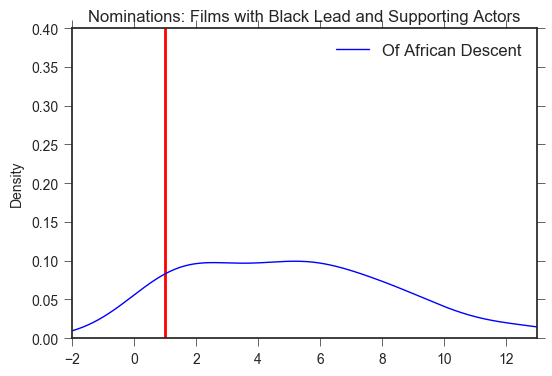

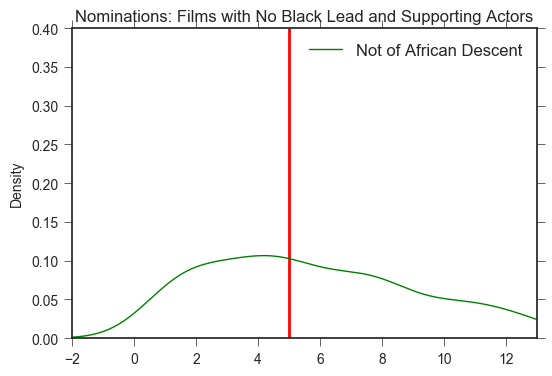

In [977]:
fig, ax = plt.subplots()

# Movies with nominations
hollywood_AW= hollywood[hollywood['Nominations'] > 0]

# Create dataframe where 'sum_totals' != 0
interest1 = hollywood_AW[hollywood_AW['sum_totals'] > 0]
interest1_opp = hollywood_AW[hollywood_AW['sum_totals'] == 0]

# Africa American 
plot1= interest1.plot.kde(x='Year', y="Nominations", color="blue", ax = ax, label = 'Of African Descent', 
                          xlim= [-2, 13], subplots= True)
ax.vlines(interest1['Nominations'].mode(), 0, 0.4, color='red', lw=2)
ax.set_title("Nominations: Films with Black Lead and Supporting Actors" ) 

# Other races
plot2= interest1_opp.plot.kde(x='Year', y="Nominations", color="green", label = 'Not of African Descent', xlim= [-2, 13])
plot2.set_title("Nominations: Films with No Black Lead and Supporting Actors" ) 
plot2.vlines(interest1_opp['Nominations'].mode(), 0, 0.4, color='red', lw=2)

### Gross Revenue of Films that contained African American Actors and Actresses

Graph of films that contained African American male actors and African American female actors, and the film's respective gross revenues. We see from the graph that film's with African American males significantly gross higher than films that have African American females. 

In [980]:
# AA hollywood 
hollywoodR_F= hollywood.loc[(hollywood['sex_1'] == 'Female') | (hollywood['sex_2'] == 'Female') | 
                            (hollywood['sex_3'] == 'Female')]
hollywoodR_M= hollywood.loc[(hollywood['sex_1'] == 'Male') | (hollywood['sex_2'] == 'Male') | 
                            (hollywood['sex_3'] == 'Male')]
# Not AA hollywood
hollywoodN_F= hollywood.loc[(hollywood['sex_1'] == 'Female') | (hollywood['sex_2'] == 'Female') | 
                            (hollywood['sex_3'] == 'Female')]
hollywoodN_M= hollywood.loc[(hollywood['sex_1'] == 'Male') | (hollywood['sex_2'] == 'Male') | 
                            (hollywood['sex_3'] == 'Male')]

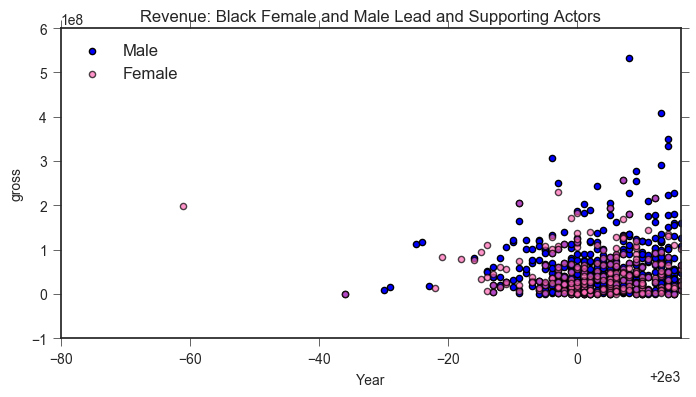

In [981]:
# Growth of black actors in high budget films, male vs. female
plt.style.use("seaborn-pastel")

fig, ax = plt.subplots(figsize = (8, 4)) # 2 subplots

# Male

hollywoodR_M.plot(x='Year', y="gross", ax=ax, kind="scatter",
                                 color="blue", label ='Male')
# Female
hollywoodR_F.plot(x='Year', y="gross", ax=ax, kind="scatter",
                                 color="#FF69B4", alpha= 0.7, label ='Female')

ax.set_xlim(1920, 2016)
ax.legend(loc='best')
ax.set_title("Revenue: Black Female and Male Lead and Supporting Actors" ) 



Seperate graphs of gross revenue of films that contain African American lead and supporting actors, per year.
We see that the trend of African American males in high revenue yielding films is increasing. The opposite can be seen for films with African American females in high grossing films; this is likely due to the outlier of Hattie McDaniel in the 1939 film "Gone with the Wind". 

/Users/eunicefamodimu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


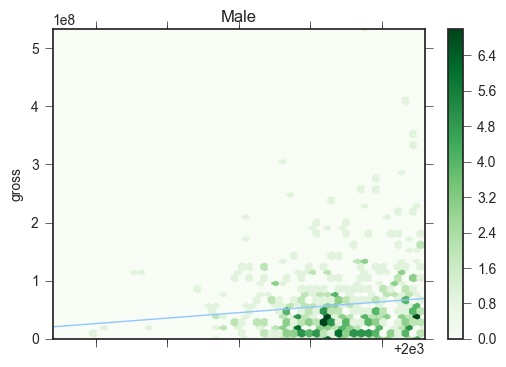

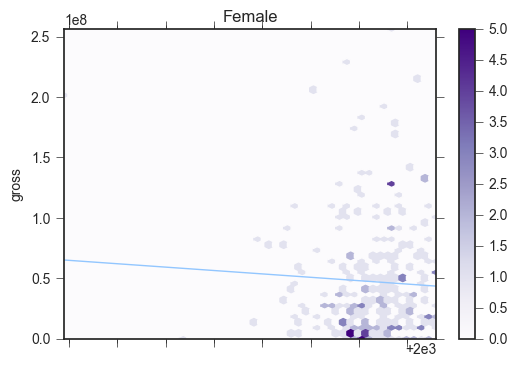

In [982]:
# MALE

# Data no NAN's
interest2= hollywoodR_M[hollywoodR_M['gross'].notnull()]

# Define variables
x= interest2['Year']
y= interest2['gross']

# Best fit line
fit= np.polyfit(x, y, deg=1)
fit_fn = np.poly1d(fit)
interest2['trendline']= fit_fn(interest2['Year'])

# Plot
ax1 = interest2.plot.hexbin(x='Year', y='gross', cmap = plt.cm.Greens,     # Hexbin plot
                           gridsize= 50, label ='male')                   
interest2.set_index(x, inplace=True)                                      # Index by year
interest2.trendline.sort_index(ascending=False).plot(ax=ax1, subplots= True)
plt.gca().invert_xaxis() 
ax1.set_title("Male" ) 




# FEMALE

# Define variables
u = interest3['Year']
v = interest3['gross']

# Best fit line
fit2= np.polyfit(u, v, deg=1)
fit2_fn = np.poly1d(fit2)
interest3['trendline']= fit2_fn(interest3['Year'])

# Plot
ax2 = interest3.plot.hexbin(x='Year', y='gross', cmap = plt.cm.Purples,     # Hexbin plot
                           gridsize= 50, label ='Female')                   
interest3.set_index(u, inplace=True)                                      # Index by year
interest3.trendline.sort_index(ascending=False).plot(ax=ax2)
plt.gca().invert_xaxis()  
ax2.set_title("Female" ) 